In [1]:
using ColoringNames
using JLD
using MLLabelUtils
using MLDataPattern
using Plots
using DataFrames

In [2]:
full64_param_path = "../models/good/1706031148_sib0.5/params.jld"
full64_params = load(full64_param_path)
full64_mdl = restore(TermToColorDistributionNetwork, full64_param_path, full64_params["model_path"])

full256_param_path = "../models/highdim/sib0.5/final_params.jld"
full256_params = load(full256_param_path)
full256_mdl = restore(TermToColorDistributionNetwork, full256_param_path, full256_params["model_path"])


2017-06-27 08:20:24.973652: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-27 08:20:24.973756: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-27 08:20:24.973769: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-06-27 08:20:24.973780: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.


In [36]:
empirical64_params_path = "../models/noml/sib0.5_or64/final_smoothed_emprical_model.jld"
empirical64_params = load(empirical64_params_path)
empirical64_mdl = empirical64_params["model"];

empirical256_params_path = "../models/noml/sib0.5_or256/final_smoothed_emprical_model.jld"
empirical256_params = load(empirical256_params_path)
empirical256_mdl = empirical256_params["model"];

In [4]:
gr()

In [5]:
pyplot()

Plots.PyPlotBackend()

# Plots for network diagram

(h_max,s_max,v_max) = (0.453125,0.390625,0.984375)


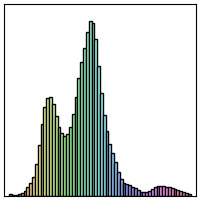


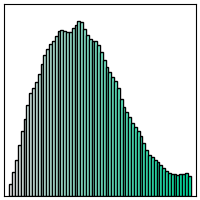


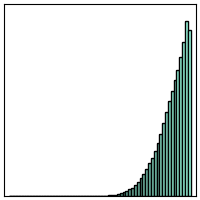

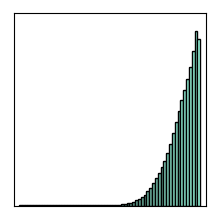

In [6]:
function plot_3hsv(hp::Vector, sp::Vector, vp::Vector)
    nbins = length(hp)
    @assert nbins == length(sp) == length(vp)
    h_max, s_max, v_max = (indmax.([hp, sp, vp]))/nbins
    @show h_max, s_max, v_max
    h_bar_colors = ColoringNames.hsv2colorant([linspace(0.0,1.0, nbins) s_max*ones(nbins) v_max*ones(nbins)])
    s_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) linspace(0.0,1.0, nbins) v_max*ones(nbins)])
    v_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) s_max*ones(nbins) linspace(0.0,1.0, nbins)])
    
    for (ps,cs,lbl) in zip([hp, sp, vp], [h_bar_colors, s_bar_colors, v_bar_colors], ["Hue", "Saturation", "Value"])
        bar(ps,
            width=1,
            legend = false,
            linewidth=0, 
            seriescolor=cs,
            #xlabel=lbl,
            size=(200,200),
            yticks=nothing,
            xticks = nothing,
        grid=false,
        
        ) |> IJulia.display
        
        savefig(joinpath("figs", "netdia", "$(lbl).pdf"))
    end
end
plot_3hsv(query(full64_mdl, "light greenish blue")...)

# Plots for discussing  Multimodality

In [37]:
function plot_hsv_both(colorname)
    filename(prefix)=joinpath("figs", "multimodal", "$(prefix)$(join(split(colorname))).pdf")
    try
        plot_hsv(query(empirical64_mdl, colorname)...;
        title=[ "" "Baseline Model (64 bins): $colorname" ""]) |> IJulia.display
        savefig(filename("empiri64"))
        
        plot_hsv(query(empirical256_mdl, colorname)...;
        title=[ "" "Baseline Model (256 bins): $colorname" ""]) |> IJulia.display
        savefig(filename("empiri256"))
    catch err
        if isa(err, KeyError)
            println("No emprical data for $colorname")
        else
            rethrow(err)
        end
    end
    plot_hsv(query(full64_mdl, colorname)...;
    title=["" "CDEST Model (64 bins): $colorname" ""]) |> IJulia.display
    savefig(filename("gru64"))
    plot_hsv(query(full256_mdl, colorname)...;
    title=["" "CDEST Model (256 bins): $colorname" ""]) |> IJulia.display
    savefig(filename("gru256"))
end

plot_hsv_both (generic function with 1 method)


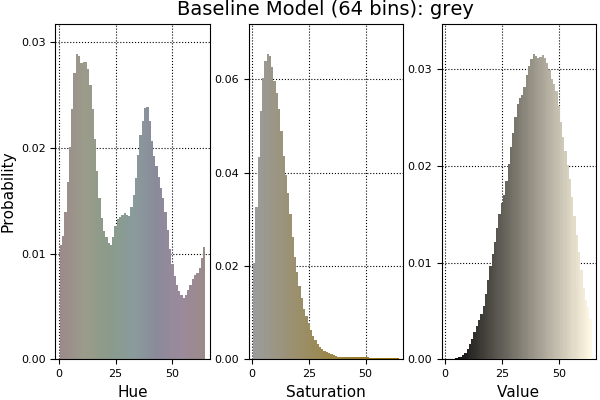

(h_max,s_max,v_max) = (0.125,0.109375,0.609375)



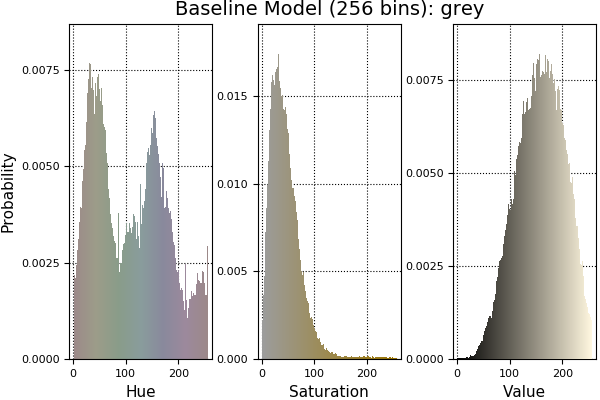

(h_max,s_max,v_max) = (0.125,0.125,0.61328125)



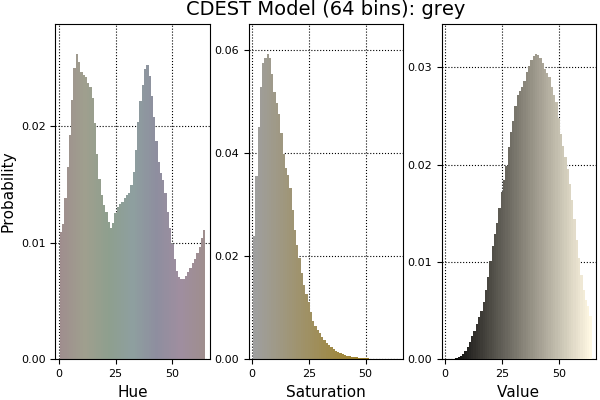

(h_max,s_max,v_max) = (0.125,0.109375,0.625)



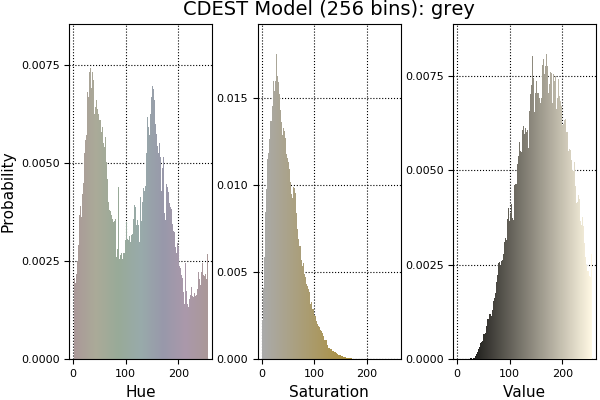

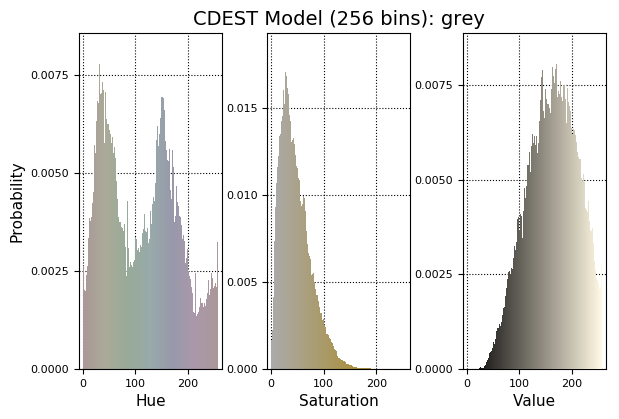

(h_max,s_max,v_max) = (0.125,0.109375,0.66796875)


In [38]:
plot_hsv_both("grey")

(h_max,s_max,v_max) = (0.171875,0.0625,0.90625)


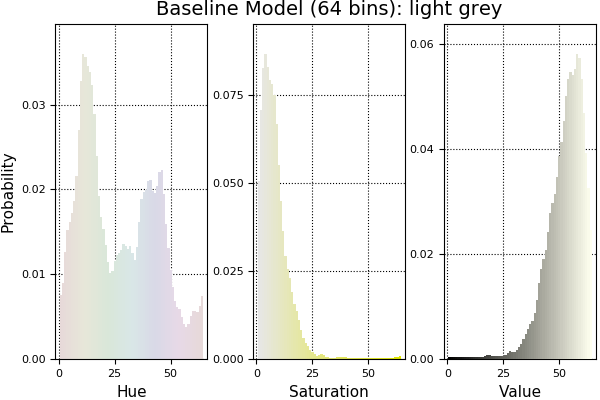


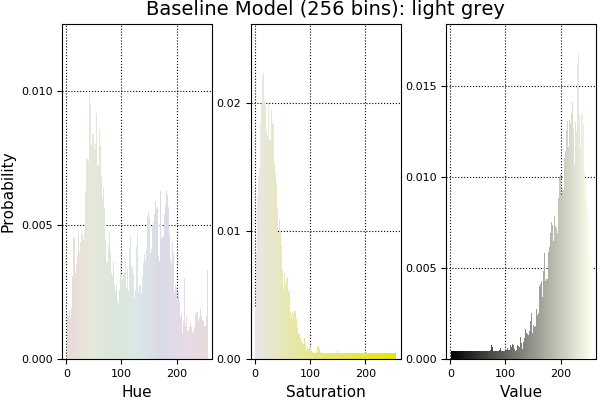

(h_max,s_max,v_max) = (0.16796875,0.05859375,0.90625)



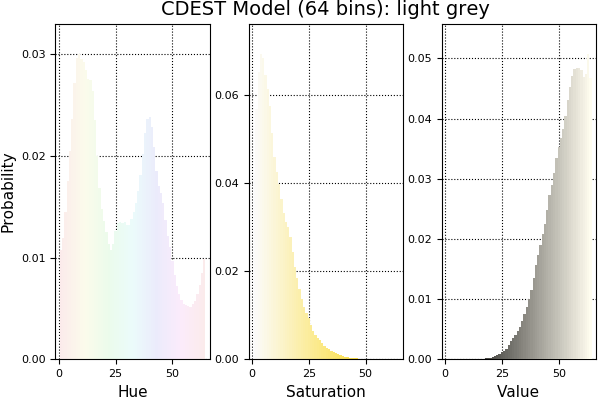

(h_max,s_max,v_max) = (0.140625,0.0625,0.984375)



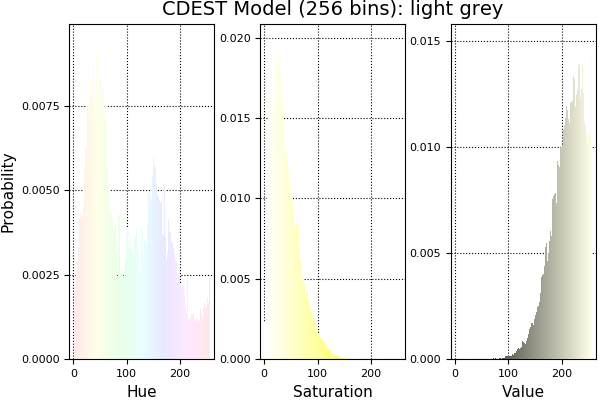

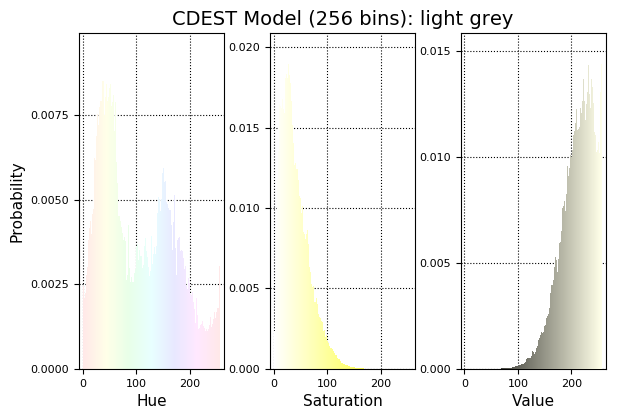

(h_max,s_max,v_max) = (0.16796875,0.08984375,1.0)


In [39]:
plot_hsv_both("light grey")


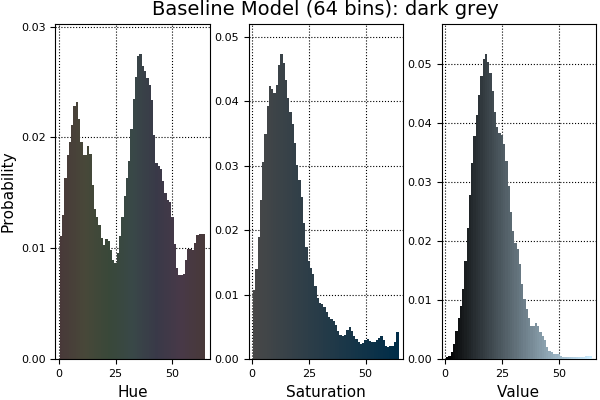

(h_max,s_max,v_max) = (0.5625,0.203125,0.28125)



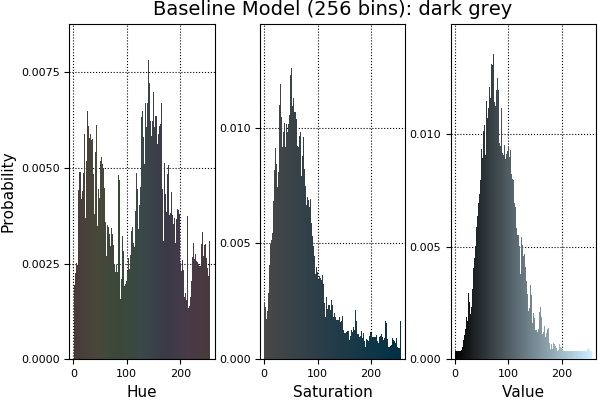

(h_max,s_max,v_max) = (0.5546875,0.1953125,0.28125)



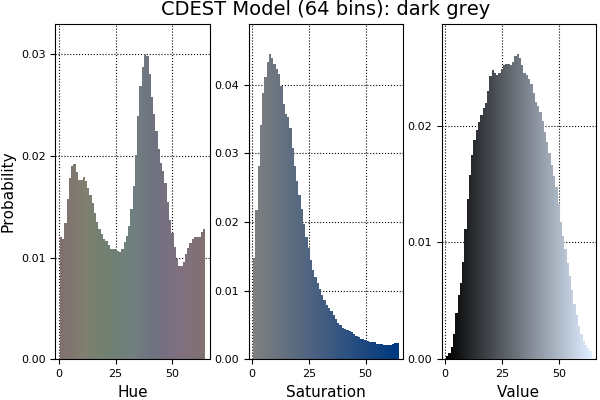

(h_max,s_max,v_max) = (0.59375,0.125,0.5)



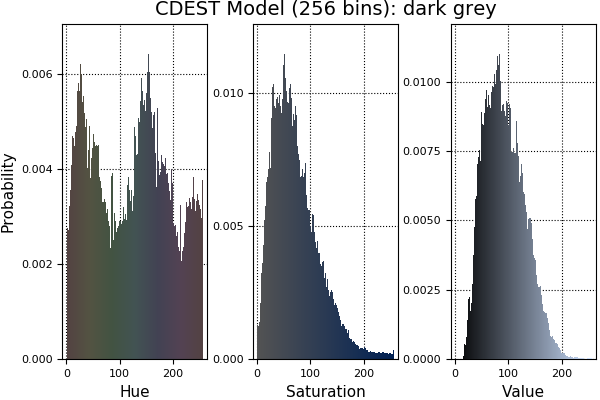

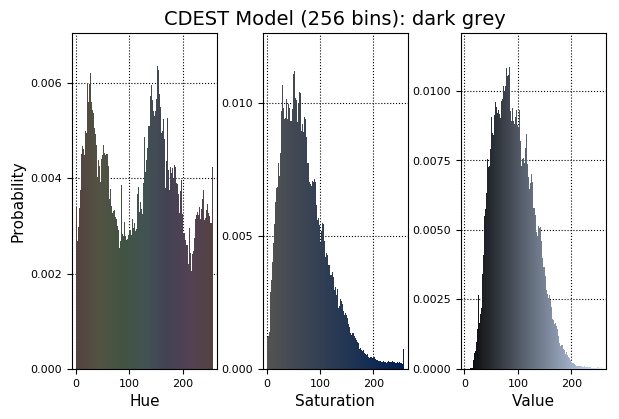

In [40]:
plot_hsv_both("dark grey")

No emprical data for very dark grey



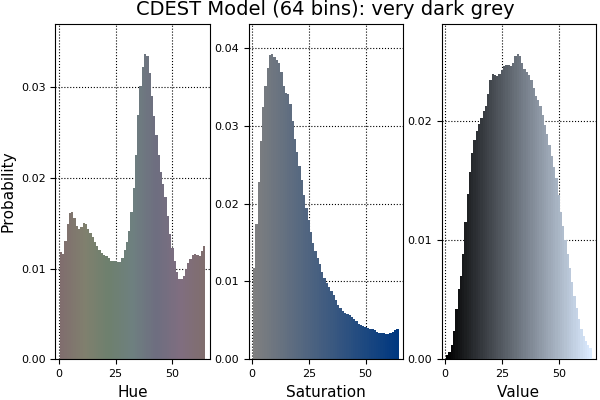

(h_max,s_max,v_max) = (0.59375,0.140625,0.5)



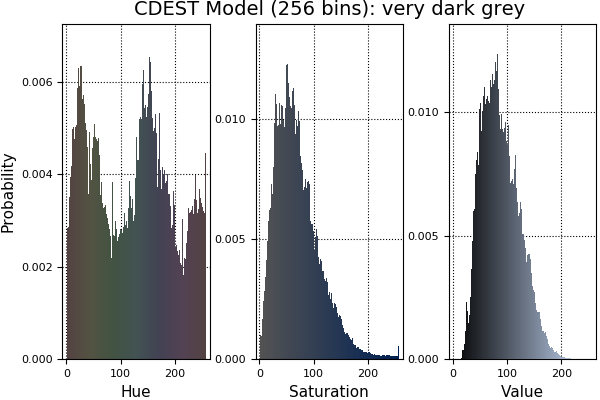

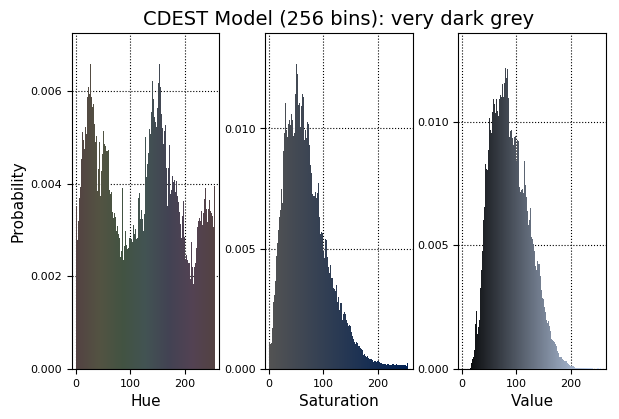

In [41]:
plot_hsv_both("very dark grey")


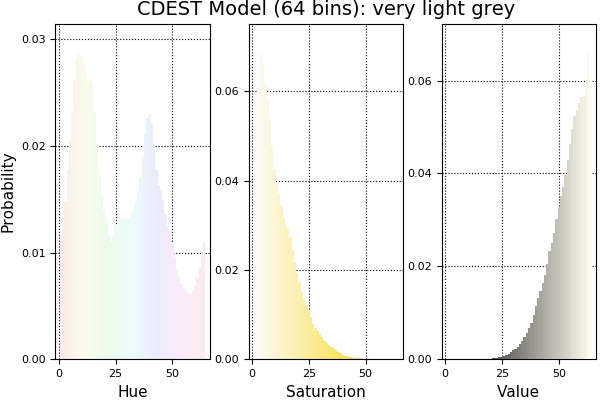

No emprical data for very light grey
(h_max,s_max,v_max) = (0.140625,0.0625,0.984375)



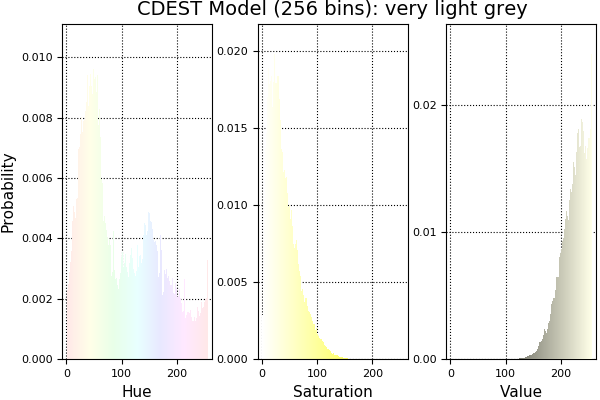

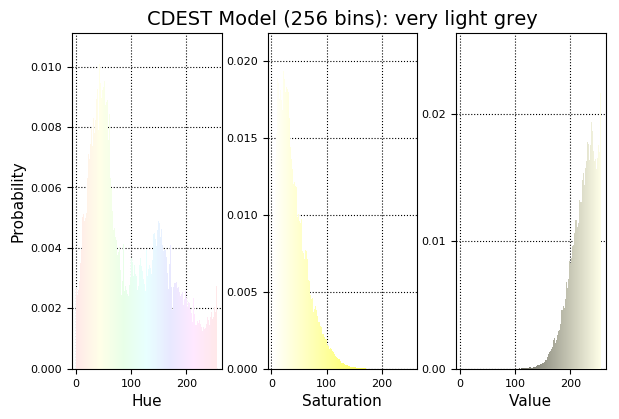

In [42]:
plot_hsv_both("very light grey")


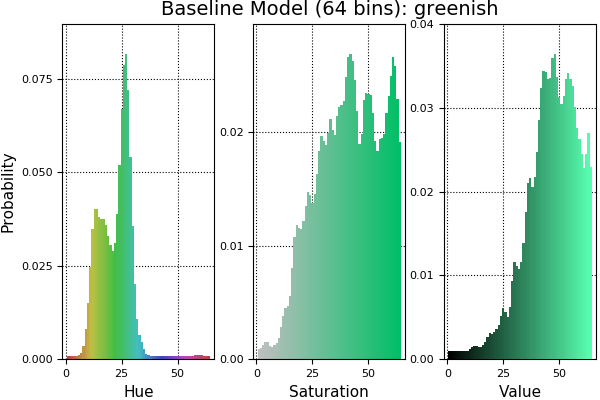

(h_max,s_max,v_max) = (0.421875,0.65625,0.75)



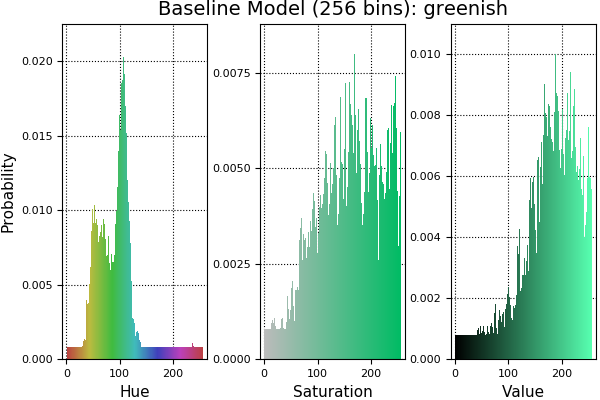

(h_max,s_max,v_max) = (0.421875,0.66015625,0.734375)



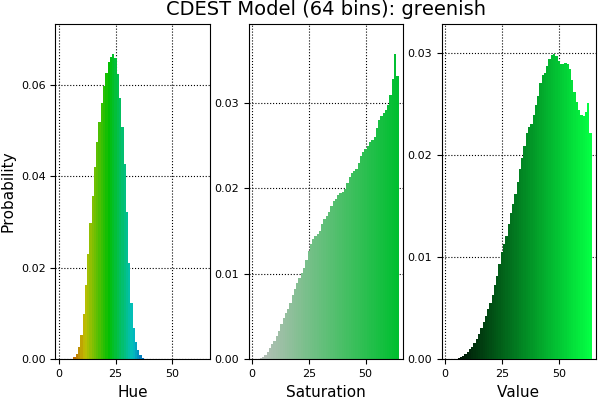

(h_max,s_max,v_max) = (0.375,0.984375,0.75)



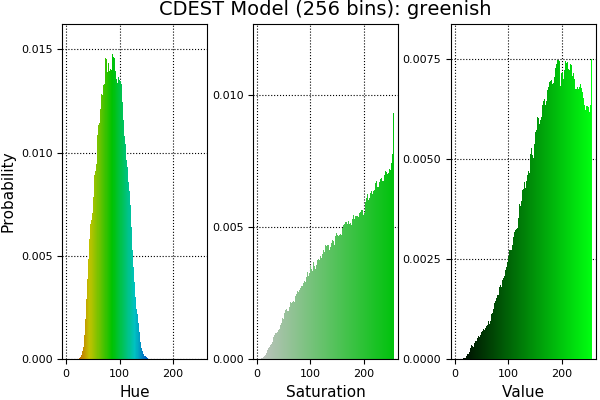

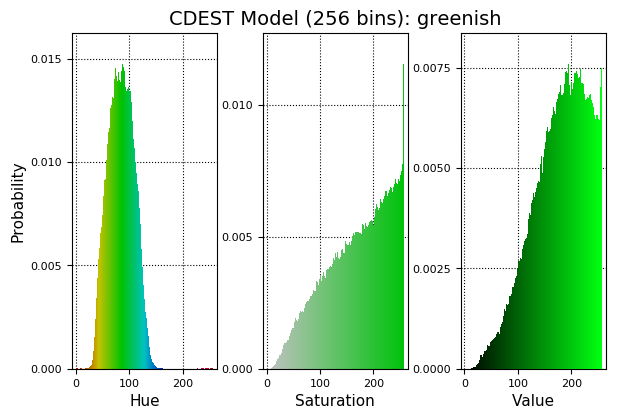

In [43]:
plot_hsv_both("greenish")


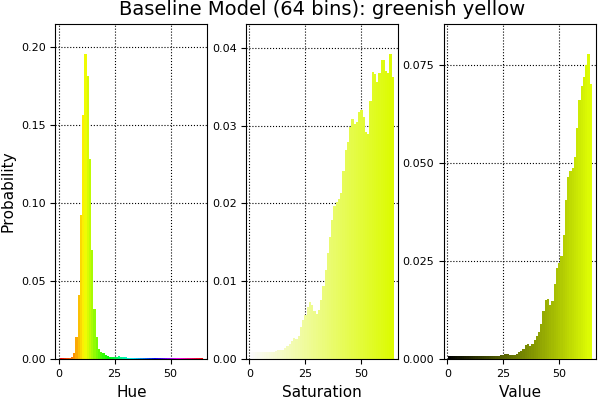

(h_max,s_max,v_max) = (0.1875,0.984375,0.984375)



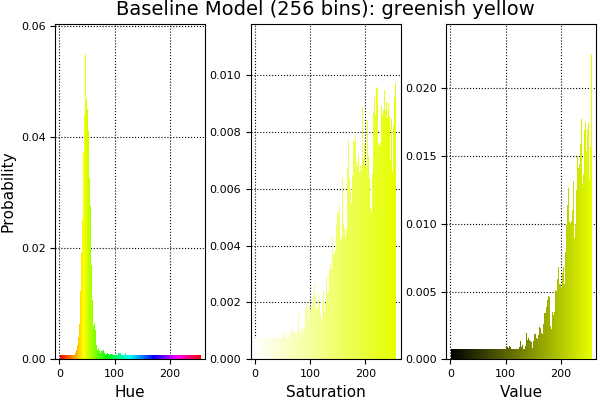

(h_max,s_max,v_max) = (0.18359375,1.0,1.0)



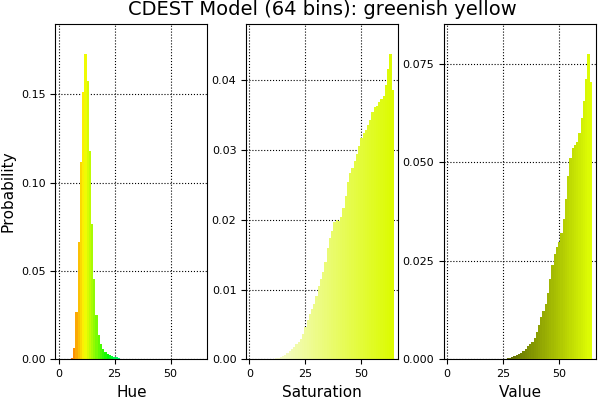

(h_max,s_max,v_max) = (0.1875,0.984375,0.984375)



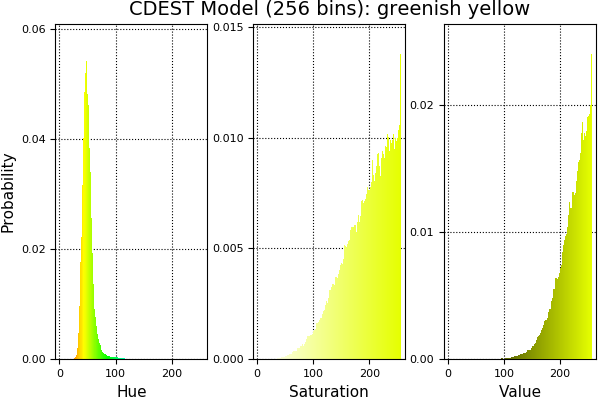

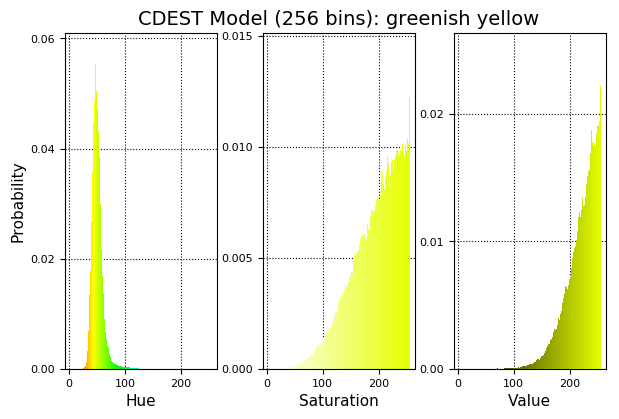

In [44]:
plot_hsv_both("greenish yellow")


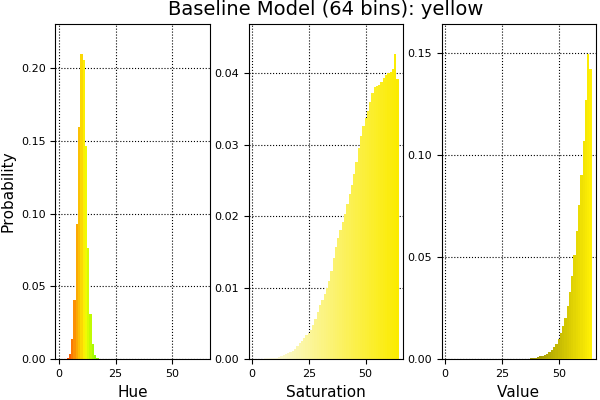

(h_max,s_max,v_max) = (0.15625,0.984375,0.984375)



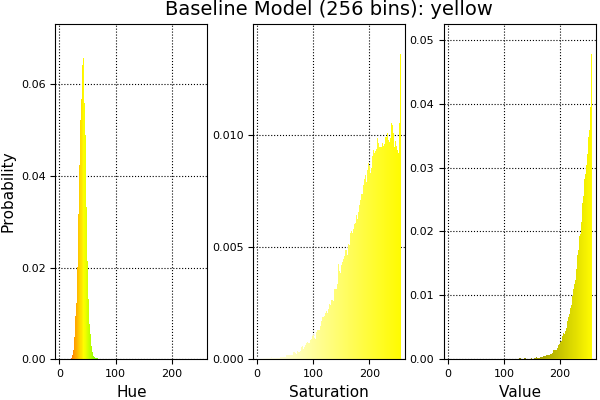

(h_max,s_max,v_max) = (0.1640625,1.0,1.0)



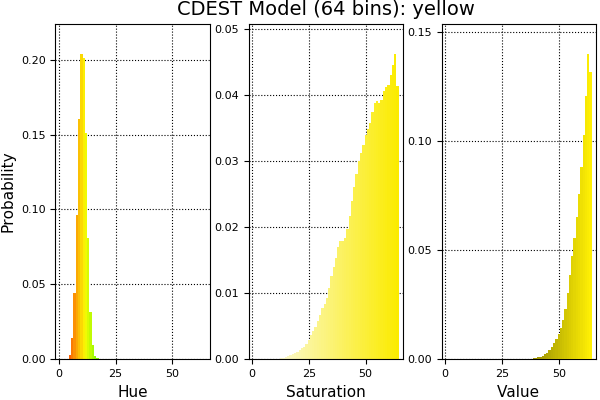

(h_max,s_max,v_max) = (0.15625,0.984375,0.984375)



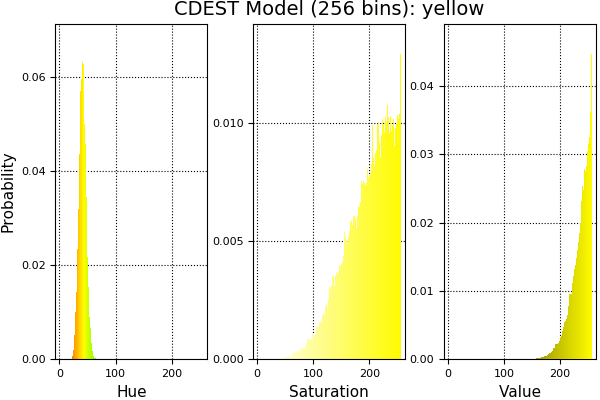

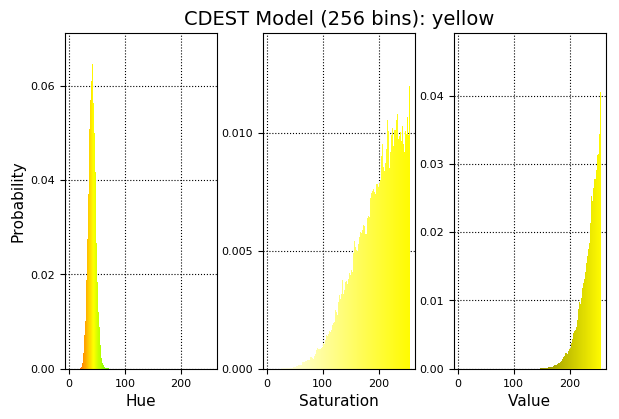

In [45]:
plot_hsv_both("yellow")


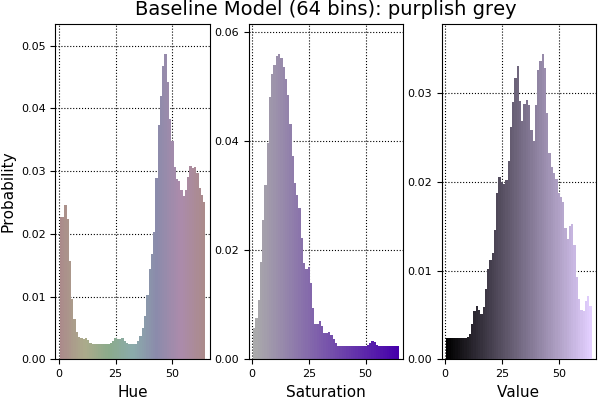

(h_max,s_max,v_max) = (0.734375,0.1875,0.671875)



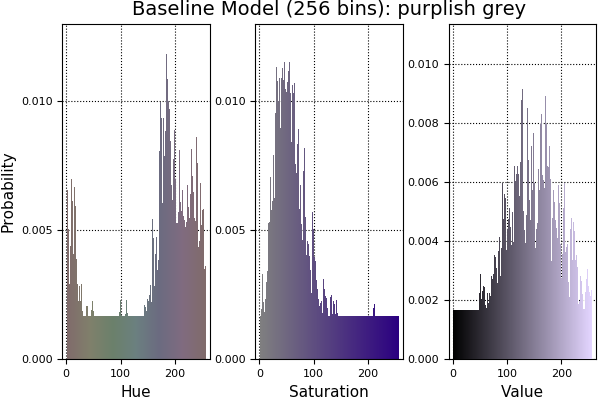

(h_max,s_max,v_max) = (0.72265625,0.1640625,0.5)



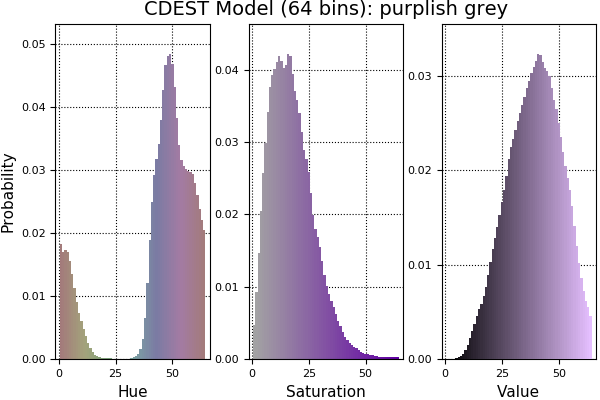

(h_max,s_max,v_max) = (0.765625,0.25,0.640625)



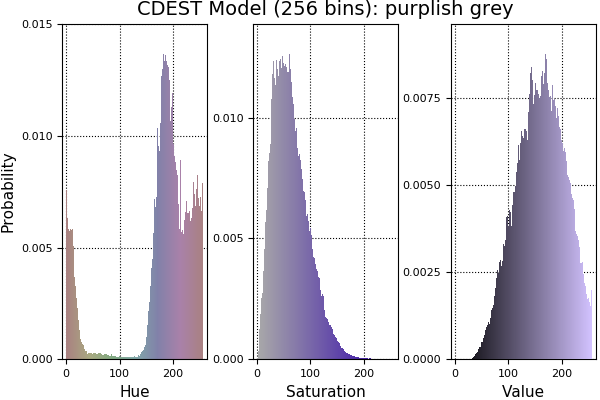

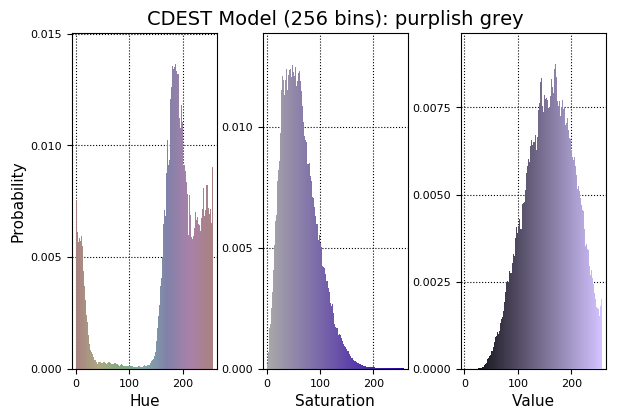

In [46]:
plot_hsv_both("purplish grey")

(h_max,s_max,v_max) = (0.71875,0.984375,0.796875)


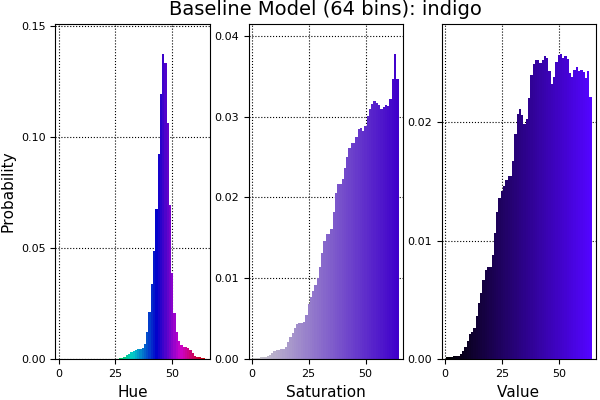


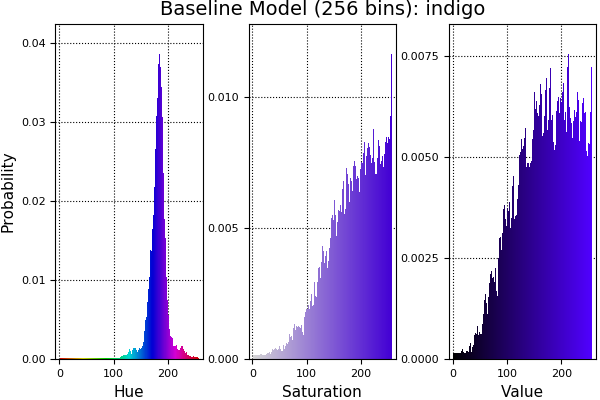

(h_max,s_max,v_max) = (0.71875,1.0,0.83203125)



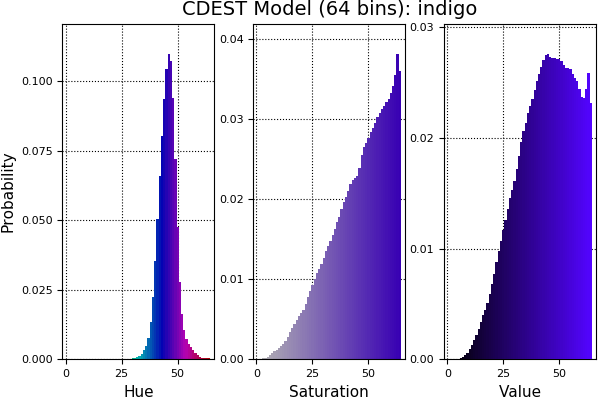

(h_max,s_max,v_max) = (0.71875,0.984375,0.703125)



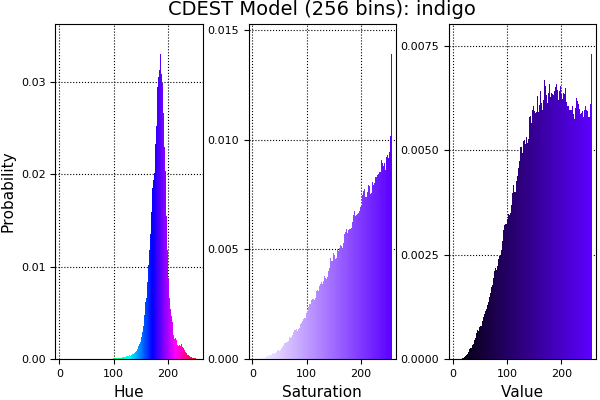

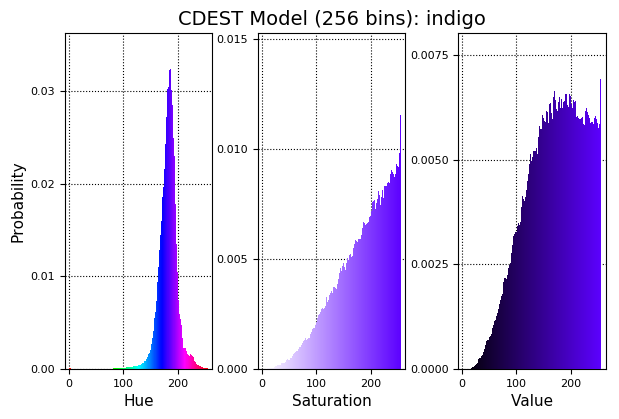

(h_max,s_max,v_max) = (0.7265625,1.0,1.0)


In [48]:
plot_hsv_both("indigo")


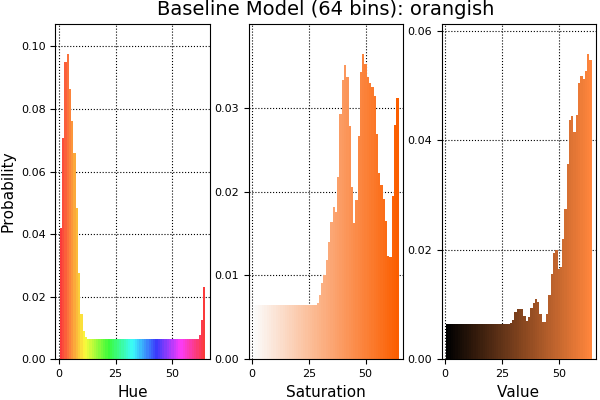

(h_max,s_max,v_max) = (0.0625,0.765625,0.984375)



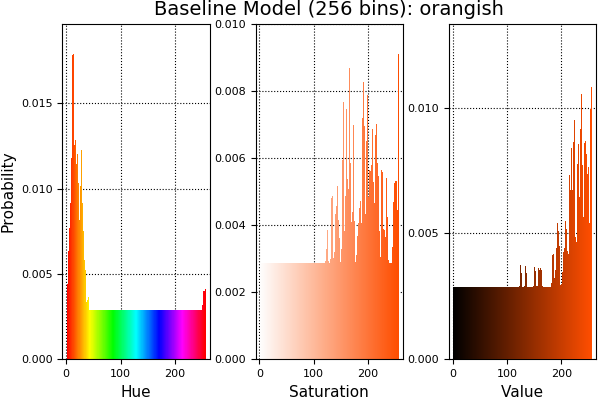

(h_max,s_max,v_max) = (0.05078125,1.0,0.99609375)



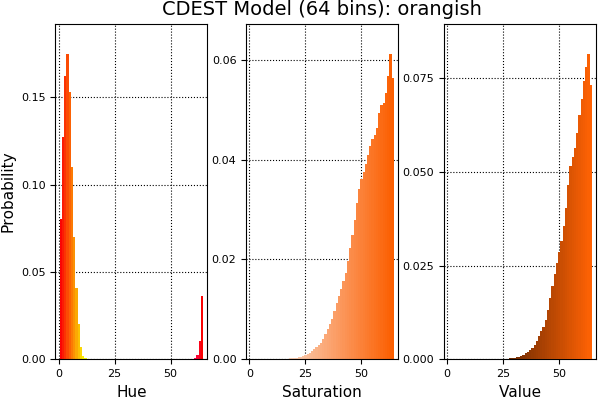

(h_max,s_max,v_max) = (0.0625,0.984375,0.984375)



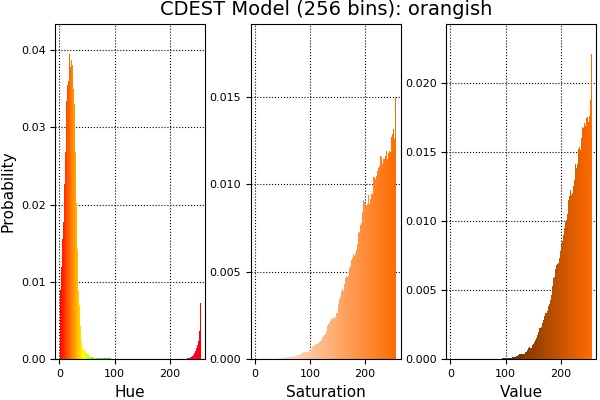

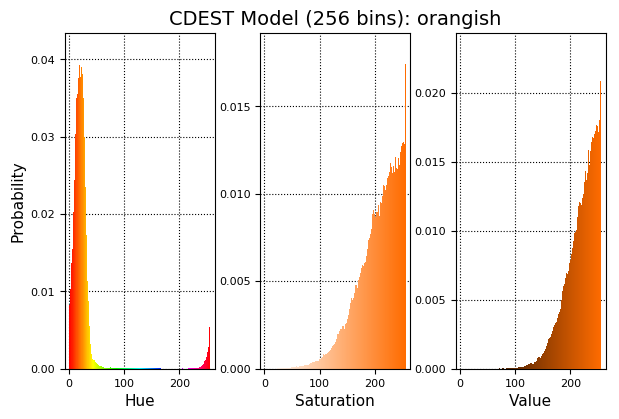

(h_max,s_max,v_max) = (0.0703125,1.0,1.0)


In [47]:
plot_hsv_both("orangish")

# Full Performance


In [19]:
function normalize_column_names(df)
    ret = copy(df)
    old_names = names(ret)
    new_names = Symbol.(replace.(string.(old_names), ["_"], [""]))
    change_inds = old_names .!= new_names
    rename!.([ret], old_names[change_inds], new_names[change_inds]) |> first
end

normalize_column_names (generic function with 1 method)

In [20]:
function results_table(entries)
    df=DataFrame(model=String[], resolution=Int[], perp=Float64[], mse_to_peak=Float64[], perp_sat=Float64[], perp_hue=Float64[], perp_val=Float64[])

    for (name, filename) in entries

        row = Dict()
        results, resolution = load(filename, "test_set_results", "output_res")
        merge!(row, results)
        row[:model] = name
        row[:resolution] = resolution
        #@show row
        push!(df, row)
    end
    df[:perp_std] = df[:perp]./df[:resolution]
    df
end

results_table (generic function with 1 method)

In [21]:
full_res=results_table([
        ("CDEST", "../models/good/1706031148_sib0.5/final_params.jld"),
        ("Baseline", "../models/noml/sib0.5_or64/final_smoothed_emprical_model.jld"),
        ("CDEST", "../models/highdim/sib0.5/final_params.jld"),
        ("Baseline", "../models/noml/sib0.5_or256/final_smoothed_emprical_model.jld"),
    ])

writetable("results/full.tsv", normalize_column_names(full_res))
full_res

,model,resolution,perp,mse_to_peak,perp_sat,perp_hue,perp_val,perp_std
1,CDEST,64,27.243940177480045,0.14256653864240346,41.83035351826448,15.353688215553092,31.48513079667489,0.4256865652731257
2,Baseline,64,27.185411089215336,0.13635443320177187,41.71739822700705,15.321913131443276,31.43239714353017,0.4247720482689896
3,CDEST,256,106.66272239346563,0.15586710509241725,164.5246153330666,60.08814174922444,122.74910518834639,0.4166512593494751
4,Baseline,256,110.05348176781128,0.14889565768008212,167.5474170706018,62.92752931339291,126.42499437682751,0.4298964131555128


# Extrapolation Performance

In [22]:
extrapo_res=results_table([    
    ("Extrapolating CDEST", "../models/good/extrapolate_sib0.5/final_extrapolation_params.jld"),
    ("Non-extrapolating CDEST", "../models/good/1706031148_sib0.5/final_extrapolation_params.jld"),
    ("Non-extrapolating Baseline", "../models/noml/sib0.5_or64/final_extrapolation_final_smoothed_emprical_model.jld"),
    ("Extrapolating CDEST", "../models/highdim/extrapolate_sib0.5/final_extrapolation_params.jld"),
    ("Non-extrapolating CDEST", "../models/highdim/sib0.5/final_extrapolation_params.jld"),
    ("Non-extrapolating Baseline", "../models/noml/sib0.5_or256/final_extrapolation_final_smoothed_emprical_model.jld")
    
])
writetable("results/extrapo.tsv", normalize_column_names(extrapo_res))
extrapo_res

,model,resolution,perp,mse_to_peak,perp_sat,perp_hue,perp_val,perp_std
1,Extrapolating CDEST,64,27.345328279859956,0.17741878032105549,41.403206241630905,15.836851420748832,31.18506173319573,0.4272707543728118
2,Non-extrapolating CDEST,64,24.782970781379966,0.16444025605588897,40.06246557568607,12.684783458928237,29.952933553470938,0.38723391845906197
3,Non-extrapolating Baseline,64,26.237074968943816,0.1354638190988665,40.71252905939027,13.914332060377482,31.882752198570635,0.4099542963897471
4,Extrapolating CDEST,256,108.78861567720475,0.20716377525888643,165.28589897949655,62.309073565681665,125.01532465473183,0.42495552998908104
5,Non-extrapolating CDEST,256,94.76880228547543,0.16677528292644445,152.79842759398292,48.312714999780056,115.29642644530199,0.3701906339276384
6,Non-extrapolating Baseline,256,128.88889624564703,0.1390601778165647,186.13062784054785,74.88808896476263,153.6087387584732,0.5034722509595587
